# Student Graduation Rate Based on Academic Data

## Logistic Regression Model

## 1) Data Pre-processing

### Importing  the libraries and the Dataset

In [2]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
dataset = pd.read_excel('../Dataset/Single-Predict.xlsx')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

dataset.head(10)

,Department,Sex,Mode,A-Att,No-Re-exams,Scholarship,CGPA,Status
0,Computer_Application,Male,Fulltime,0.683487,24,100.0,50.0000,Graduated
1,Computer_Application,Male,Parttime,0.698750,5,0.0,50.0000,Graduated
2,Accounting_and_Finance,Male,Fulltime,0.793075,0,20.0,50.0000,Graduated
3,Banking_and_Finance,Female,Fulltime,0.854400,0,0.0,50.0150,Graduated
4,Civil_Engineering,Female,Fulltime,0.882350,0,50.0,50.0250,Graduated
5,Computer_Application,Female,Fulltime,0.861500,0,0.0,50.0400,Graduated
6,Computer_Application,Male,Parttime,0.897650,0,0.0,50.0400,Graduated
7,Computer_Application,Male,Fulltime,0.875550,0,0.0,50.0400,Graduated
8,Computer_Application,Male,Fulltime,0.700625,3,0.0,50.0425,Graduated
9,Computer_Networking_and_Security,Male,Fulltime,0.932825,1,0.0,50.0625,Graduated


In [3]:
dataset.shape

(6066, 8)

From above, it is clear that the dataset contains 2 features with 3612 records.

### Analyzing the situation before prediction

In [4]:

# total_students = dataset.shape[0]
# graduated_students = len(dataset[dataset.status == 'Graduated'])
# dropout_students = len(dataset[dataset.status == 'Dropout'])

# plt.bar(['Graduated', 'Dropout'], [graduated_students, dropout_students])
# plt.xlabel('Student Status')
# plt.ylabel('Number of Students')
# plt.title('Number of Students by Status')
# plt.show()

# graduated_percentage = round((graduated_students / total_students) * 100, 2)
# dropout_percentage = round((dropout_students / total_students) * 100, 2)

# print('Total number of students:', total_students)
# print('Total number of students Graduated:', graduated_students)
# print('Total number of students Dropout:', dropout_students)
# print('Graduated percentage:', graduated_percentage, '%')
# print('Dropout percentage:', dropout_percentage, '%')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6066 entries, 0 to 6065
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   6066 non-null   object 
 1   Sex          6066 non-null   object 
 2   Mode         6066 non-null   object 
 3   A-Att        6066 non-null   float64
 4   No-Re-exams  6066 non-null   int64  
 5   Scholarship  6066 non-null   float64
 6   CGPA         6066 non-null   float64
 7   Status       6066 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 379.3+ KB


From the above output we concluded that there are no null values but there are some features that has no int values. These values have to converted to numerical categorical data

### Encoding the Independent Variables

In [6]:
# Encode categorical variables
label_encoder_sex = LabelEncoder()
label_encoder_mode = LabelEncoder()
X[:, 1] = label_encoder_sex.fit_transform(X[:, 1])
X[:, 2] = label_encoder_mode.fit_transform(X[:, 2])
print(X)
# Save the label encoders for future use
joblib.dump(label_encoder_sex, 'label_encoder_sex_single.pkl')
joblib.dump(label_encoder_mode, 'label_encoder_mode_single.pkl')

# Male = 1 Female =0  Parttime=1  Fulltime=0






[['Computer_Application' 1 0 ... 24 100.0 50.0]
 ['Computer_Application' 1 1 ... 5 0.0 50.0]
 ['Accounting_and_Finance' 1 0 ... 0 20.0 50.0]
 ...
 ['Computer_Application' 1 0 ... 0 0.0 95.62714285714286]
 ['Computer_Application' 0 0 ... 0 0.0 95.82857142857142]
 ['Pharmacology' 1 1 ... 0 0.0 96.025]]


['label_encoder_mode_single.pkl']

In [7]:
# One-Hot Encode 'Department' (assuming it's the first column)
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), [0])
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)
print(X)

# Save the ColumnTransformer for future use
joblib.dump(ct, 'ColumnTransformer_single.pkl')

[[0.0 0.0 0.0 ... 24 100.0 50.0]
 [0.0 0.0 0.0 ... 5 0.0 50.0]
 [1.0 0.0 0.0 ... 0 20.0 50.0]
 ...
 [0.0 0.0 0.0 ... 0 0.0 95.62714285714286]
 [0.0 0.0 0.0 ... 0 0.0 95.82857142857142]
 [0.0 0.0 0.0 ... 0 0.0 96.025]]


['ColumnTransformer_single.pkl']

In [8]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# # Correcting the ColumnTransformer instantiation
# ct = ColumnTransformer(
#     transformers=[
#         ('encoder', OneHotEncoder(sparse_output=False), [0])
#     ],
#     remainder='passthrough'
# )

# # Assuming X is already defined
# X = np.array(ct.fit_transform(X))

# # Print the transformed array
# print(X)

In [9]:
dataset.head(10)

,Department,Sex,Mode,A-Att,No-Re-exams,Scholarship,CGPA,Status
0,Computer_Application,Male,Fulltime,0.683487,24,100.0,50.0000,Graduated
1,Computer_Application,Male,Parttime,0.698750,5,0.0,50.0000,Graduated
2,Accounting_and_Finance,Male,Fulltime,0.793075,0,20.0,50.0000,Graduated
3,Banking_and_Finance,Female,Fulltime,0.854400,0,0.0,50.0150,Graduated
4,Civil_Engineering,Female,Fulltime,0.882350,0,50.0,50.0250,Graduated
5,Computer_Application,Female,Fulltime,0.861500,0,0.0,50.0400,Graduated
6,Computer_Application,Male,Parttime,0.897650,0,0.0,50.0400,Graduated
7,Computer_Application,Male,Fulltime,0.875550,0,0.0,50.0400,Graduated
8,Computer_Application,Male,Fulltime,0.700625,3,0.0,50.0425,Graduated
9,Computer_Networking_and_Security,Male,Fulltime,0.932825,1,0.0,50.0625,Graduated


### Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
print (Y)


[1 1 1 ... 1 1 1]


In [11]:
dataset.columns

Index(['Department', 'Sex', 'Mode', 'A-Att', 'No-Re-exams', 'Scholarship',
       'CGPA', 'Status '],
      dtype='object')

In [12]:
# import seaborn as sns
# custom_palette = {'0': 'orange', '1': 'blue'}
# sns.countplot(x='status_encoded', data=dataset,  palette=custom_palette, legend=False)
# plt.title('Count Plot of Transformed Status')
# plt.show()

#### Data Visualization


In [13]:
# dataset.hist(edgecolor='black',bins = 25, figsize= (20,20))
# plt.show()

The hist() method of pandas is used to represent the histograms of each feature specified in the data frame

### Splitting the dataset into the Training set and Test set

In [14]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("y_test:", y_test)



y_test: [1 1 0 ... 0 1 1]


### Feature Scaling

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Save the scaler for future use
joblib.dump(sc, 'StandardScaler_single.pkl')



['StandardScaler_single.pkl']

## 2) Modeling / Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [17]:
scores_df=pd.DataFrame({'Model':[], 'F1_score':[], 'Accuracy':[]})

Since the target feature is categorical, the Machine learning models that are used to train and predict on this dataset should be of type Classification

The various metrics for evaluating Classification models are

* Accuracy
* Recall
* Precision
* F1_score

### Training the Logistic Regression Classification model on the Training set

Logistic Regression is used for predicting the categorical dependent variable using a given set of independent variable

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import pandas as pd


# Logistic regression
lr = LogisticRegression(C=0.1, max_iter=250, class_weight='balanced')

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# # Print F1 Score and Accuracy
# print('{}\'s F1_Score :{}'.format(type(lr).__name__, f1_score(y_test, y_pred)))
# print('{}\'s Accuracy :{}'.format(type(lr).__name__, accuracy_score(y_test, y_pred)))

# Use the concat method to combine the new data with the existing DataFrame
scores_df = pd.DataFrame()
scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(lr).__name__],
                               'F1_score':[round(f1_score(y_test, y_pred), 2)],
                               'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
                               })], ignore_index=True)
print(f"The Accuracy of Logistic Regression Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       441
           1       1.00      0.97      0.98       773

    accuracy                           0.98      1214
   macro avg       0.97      0.98      0.97      1214
weighted avg       0.98      0.98      0.98      1214

The Accuracy of Logistic Regression Model is 0.98 and F1_score is 0.98


In [19]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98


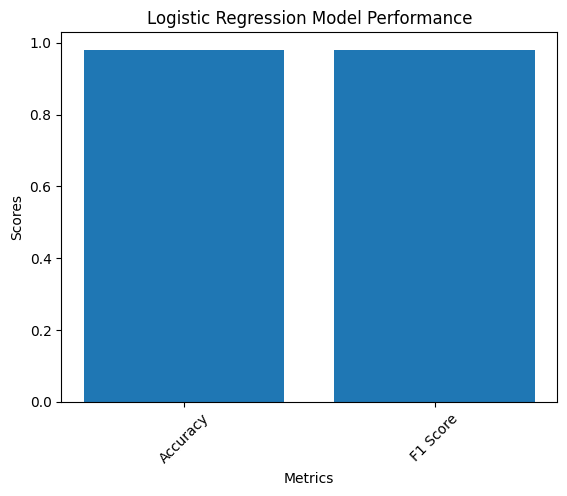

In [20]:
import matplotlib.pyplot as plt

accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Performance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Predicting the Test set results

In [21]:
y_pred = lr.predict(X_test)
print("Predicted vs. Actual Values'")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs. Actual Values'
[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


### Training the Naive Bayes ( BernoulliNB )Classification model on the Training set

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [22]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(nb).__name__,f1_score(y_test, y_pred)))

# Use the concat method to combine the new data with the existing DataFrame
scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(nb).__name__],
                               'F1_score':[round(f1_score(y_test, y_pred), 2)],
                               'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
                               })], ignore_index=True)
print(f"The Accuracy of Naïve Bayes Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       441
           1       0.93      0.81      0.87       773

    accuracy                           0.84      1214
   macro avg       0.83      0.85      0.83      1214
weighted avg       0.86      0.84      0.84      1214

BernoulliNB's F1_Score :0.8658367911479945
The Accuracy of Naïve Bayes Model is 0.84 and F1_score is 0.87


In [23]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98
1,BernoulliNB,0.87,0.84


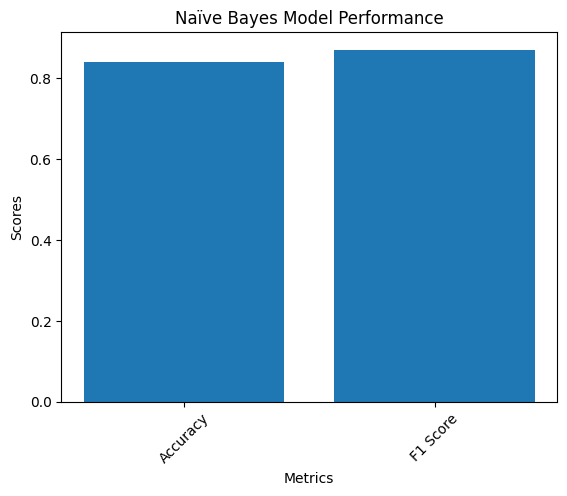

In [24]:
import matplotlib.pyplot as plt
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Naïve Bayes Model Performance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Predicting the Test set results

In [25]:
y_pred = nb.predict(X_test)
print("Predicted vs. Actual Values'")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs. Actual Values'
[[1 1]
 [1 1]
 [1 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


### Training the  K Nearest Neighbour Classification model on the Training set

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories

In [26]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, algorithm='auto')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
# # print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
# print('{}\'s F1_Score :{}'.format(type(knn).__name__,f1_score(y_test, y_pred)))

# Use the concat method to combine the new data with the existing DataFrame
scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(knn).__name__],
                               'F1_score':[round(f1_score(y_test, y_pred), 2)],
                               'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
                               })], ignore_index=True)
print(f"The Accuracy of  K Nearest Neighbour Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       441
           1       0.93      0.97      0.95       773

    accuracy                           0.94      1214
   macro avg       0.94      0.92      0.93      1214
weighted avg       0.94      0.94      0.94      1214

The Accuracy of  K Nearest Neighbour Model is 0.94 and F1_score is 0.95


In [27]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98
1,BernoulliNB,0.87,0.84
2,KNeighborsClassifier,0.95,0.94


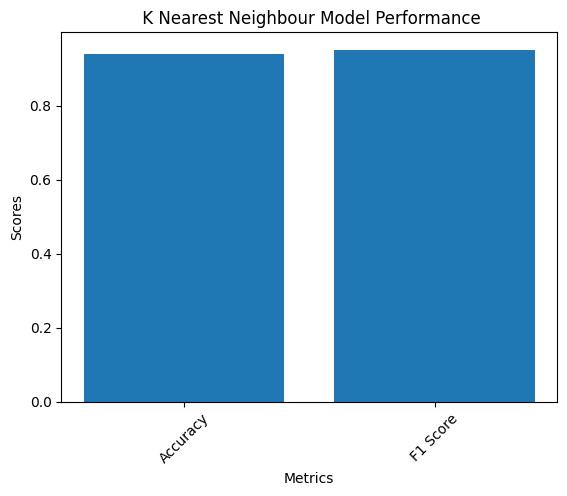

In [28]:
import matplotlib.pyplot as plt
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title(' K Nearest Neighbour Model Performance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [29]:
y_pred = knn.predict(X_test)
print("Predicted vs. Actual Values'")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs. Actual Values'
[[1 1]
 [1 1]
 [1 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


### Training the Decision Tree Classification model on the Training set

Decision Tree is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome

In [30]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))
# # print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
# print('{}\'s F1_Score :{}'.format(type(dt).__name__,f1_score(y_test, y_pred)))

# Use the concat method to combine the new data with the existing DataFrame
scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(dt).__name__],
                               'F1_score':[round(f1_score(y_test, y_pred), 2)],
                               'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
                               })], ignore_index=True)
print(f"The Accuracy of Decision Tree Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1214
   macro avg       1.00      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214

The Accuracy of Decision Tree Model is 1.0 and F1_score is 1.0


In [31]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98
1,BernoulliNB,0.87,0.84
2,KNeighborsClassifier,0.95,0.94
3,DecisionTreeClassifier,1.00,1.00


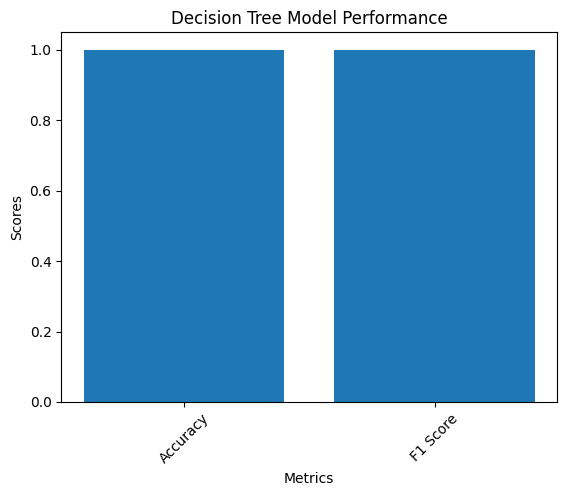

In [32]:
import matplotlib.pyplot as plt
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Decision Tree Model Performance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
y_pred = dt.predict(X_test)
print("Predicted vs. Actual Values'")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs. Actual Values'
[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


### Training the  Support Vector Machine Classification model on the Training set

SVM algorithm creates the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [34]:
# svm

from sklearn.svm import SVC

svm = SVC(C=0.001)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))
# # print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
# print('{}\'s F1_Score :{}'.format(type(svm).__name__,f1_score(y_test, y_pred)))

# Use the concat method to combine the new data with the existing DataFrame
scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(svm).__name__],
                               'F1_score':[round(f1_score(y_test, y_pred), 2)],
                               'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
                               })], ignore_index=True)
print(f"The Accuracy of Support Vector Machine Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.64      1.00      0.78       773

    accuracy                           0.64      1214
   macro avg       0.32      0.50      0.39      1214
weighted avg       0.41      0.64      0.50      1214

The Accuracy of Support Vector Machine Model is 0.64 and F1_score is 0.78


c:\Users\Abdil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98
1,BernoulliNB,0.87,0.84
2,KNeighborsClassifier,0.95,0.94
3,DecisionTreeClassifier,1.00,1.00
4,SVC,0.78,0.64


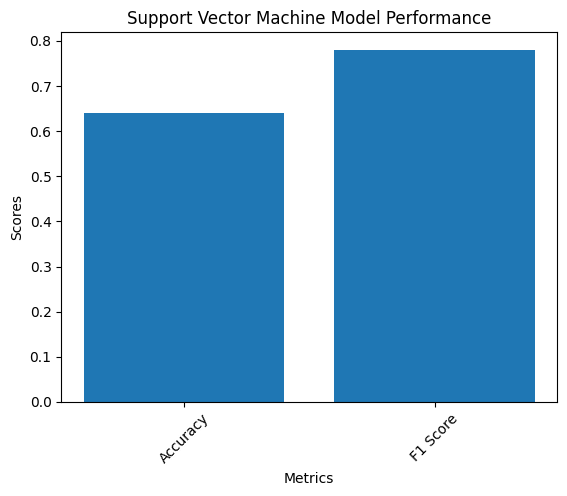

In [36]:
import matplotlib.pyplot as plt
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Support Vector Machine Model Performance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [37]:
y_pred = svm.predict(X_test)
print("Predicted vs. Actual Values'")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs. Actual Values'
[[1 1]
 [1 1]
 [1 0]
 ...
 [1 0]
 [1 1]
 [1 1]]


### Training the  Random Forest Classifier Classification model on the Training set

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset

In [38]:
#random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=13, criterion='gini',max_depth=10, max_features='sqrt', random_state=0)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)


print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
# print('{}\'s F1_Score :{}'.format(type(rf).__name__,f1_score(y_test, y_pred)))

# Use the concat method to combine the new data with the existing DataFrame
scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(rf).__name__],
                               'F1_score':[round(f1_score(y_test, y_pred), 2)],
                               'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
                               })], ignore_index=True)
print(f"The Accuracy of Random Forest Classifier Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1214
   macro avg       1.00      1.00      1.00      1214
weighted avg       1.00      1.00      1.00      1214

The Accuracy of Random Forest Classifier Model is 1.0 and F1_score is 1.0


In [39]:
scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98
1,BernoulliNB,0.87,0.84
2,KNeighborsClassifier,0.95,0.94
3,DecisionTreeClassifier,1.00,1.00
4,SVC,0.78,0.64
5,RandomForestClassifier,1.00,1.00


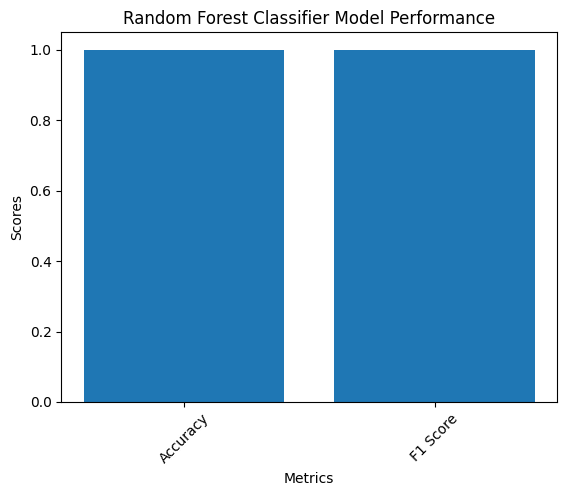

In [40]:
import matplotlib.pyplot as plt
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Random Forest Classifier Model Performance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [41]:
y_pred = rf.predict(X_test)
print("Predicted vs. Actual Values'")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted vs. Actual Values'
[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


Here we are using Yellowbrick for visualization of model prediction

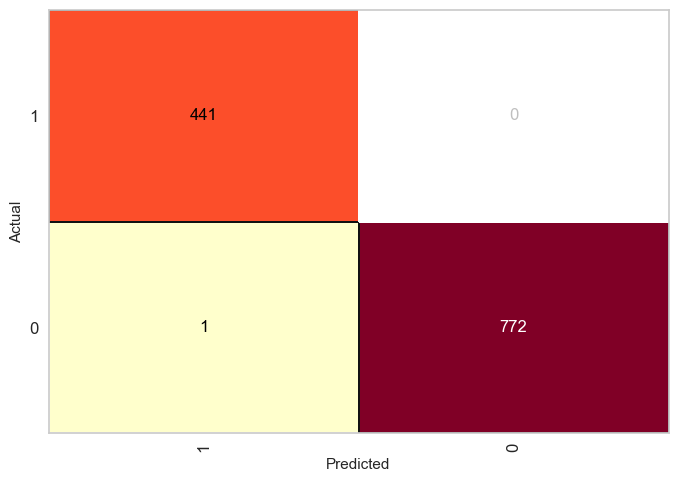

In [42]:
classes = [1,0]
from yellowbrick.classifier import ConfusionMatrix
visualizer = ConfusionMatrix(rf, classes=classes, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Text(0.5, 1.0, 'Predicted against Actual plot')

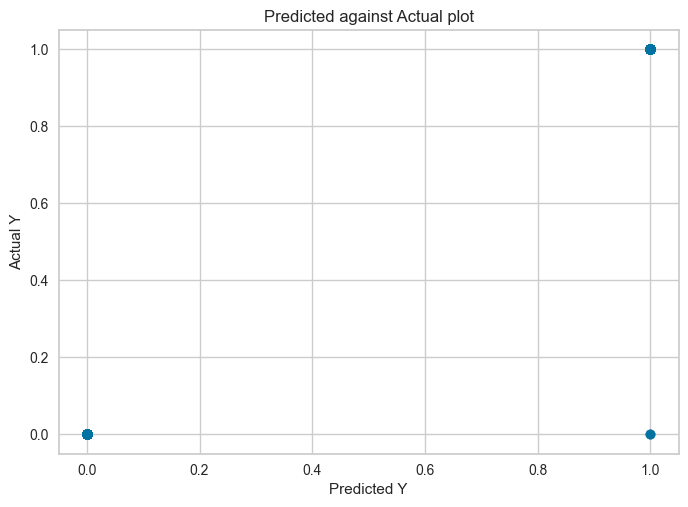

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.title("Predicted against Actual plot")

### XGBOOST

In [44]:
# pip install xgboost

In [45]:

# import xgboost as xgb
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer

# numeric_pipeline = Pipeline(
#     steps=[("impute", SimpleImputer(strategy="mean")),
#            ("scale", StandardScaler())]
# )
# num_cols = X.select_dtypes(include="number").columns

# full_processor = ColumnTransformer(
#     transformers=[
#         ("numeric", numeric_pipeline, num_cols),
#     ]
# )

# X_processed = full_processor.fit_transform(X)
# y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
#     y.values.reshape(-1, 1)
# )

# X_train, X_test, y_train, y_test = train_test_split(
#     X_processed, y_processed, stratify=y_processed, random_state=50
# )

# model = xgb.XGBClassifier()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)


# print(classification_report(y_test,y_pred))
# # print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
# print('{}\'s F1_Score :{}'.format(type(model).__name__,f1_score(y_test, y_pred)))

# # Use the concat method to combine the new data with the existing DataFrame
# scores_df = pd.concat([scores_df, pd.DataFrame({'Model':[type(model).__name__],
#                                'F1_score':[round(f1_score(y_test, y_pred), 2)],
#                                'Accuracy':[round(accuracy_score(y_test, y_pred), 2)]
#                                })], ignore_index=True)
# print(f"The Accuracy of XGBOOST Model is {round(accuracy_score(y_test, y_pred), 2)} and F1_score is {round(f1_score(y_test, y_pred), 2)}")

Since the data is unbalanced F1_score is considered superior to model accuracy in determining the better ML algorithm.

Therefore, the Accuracy and F1_Score of different models stated above are

In [46]:

scores_df

,Model,F1_score,Accuracy
0,LogisticRegression,0.98,0.98
1,BernoulliNB,0.87,0.84
2,KNeighborsClassifier,0.95,0.94
3,DecisionTreeClassifier,1.00,1.00
4,SVC,0.78,0.64
5,RandomForestClassifier,1.00,1.00


## Conclusion

Among the above classifiers Random Forest Classifier performs well on this dataset. It has higher values in terms of both Accuracy - 99% and F1 Score - 0.99(approximately)

### Model Saving

In [47]:
from joblib import Parallel, delayed
import joblib
joblib.dump(rf, 'model_single.pkl')


['model_single.pkl']

In [48]:
dataset.columns

Index(['Department', 'Sex', 'Mode', 'A-Att', 'No-Re-exams', 'Scholarship',
       'CGPA', 'Status '],
      dtype='object')

In [49]:
# Load the saved encoders, scaler, and model
label_encoder_sex = joblib.load('label_encoder_sex_single.pkl')
label_encoder_mode = joblib.load('label_encoder_mode_single.pkl')
column_transformer = joblib.load('ColumnTransformer_single.pkl')
sc = joblib.load('StandardScaler_single.pkl')
model = joblib.load('model_single.pkl')

# Create a DataFrame for the input data
input_data = pd.DataFrame([{
    'Department': 'Computer_Application',
    'Sex': 'Female',
    'Mode': 'Parttime',
    'T-Att': 0.71,
    'Discounts':100,
    'NO-Re-exams':9,
    'CGPA':50,

}])

# Apply Label Encoding to 'Gender' and 'Mode'
input_data['Sex'] = label_encoder_sex.transform(input_data['Sex'])
input_data['Mode'] = label_encoder_mode.transform(input_data['Mode'])

# Transform the input data using the loaded ColumnTransformer
transformed_data = column_transformer.transform(input_data)

# Apply feature scaling
transformed_data = sc.transform(transformed_data)

# Make predictions
predictions = model.predict(transformed_data)

# Determine the prediction label
prediction_label = "Will Graduate" if predictions[0] == 1 else "Dropout"
print("Predicted status:", prediction_label)
print("______________________________________")


Predicted status: Will Graduate
______________________________________


c:\Users\Abdil\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [50]:
print("Gender categories:", label_encoder_sex.classes_)
print("Mode categories:", label_encoder_mode.classes_)


Gender categories: ['Female' 'Male' 'male']
Mode categories: ['Fulltime' 'Parttime']


## GUI


In [51]:
# !pip install gradio

In [52]:
# import gradio as gr
# import pandas as pd
# import joblib

# from sklearn.preprocessing import StandardScaler

# model = joblib.load('Student_Graduation_prediction_model.pkl')
# sc = joblib.load('StandardScaler.pkl')


# def predict(cgpa):
#     scaled_cgpa = sc.transform([[cgpa]])
#     prediction = model.predict(scaled_cgpa)
#     prediction_label = "Will Graduate" if prediction[0] == 1 else "Dropout"


#     return ("Predicted status:"+ "  "  , prediction_label)


# Interface = gr.Interface(
#     theme=gr.themes.Soft(),
#     title="Future Student Graduation Rate Prediction Based on Academic Data using Machine Learning",
#     description="Enter your CGPA and get the predicted graduation status.",
#     fn=predict,
#     inputs = gr.Slider(minimum=0.0, maximum=4.0, label="CGPA"),
#     outputs=gr.Textbox(label="Predicted Graduation Status"),
#     submit_btn = gr.Button("Predict")




# )

# Interface.launch(share=True,)
# demo.launch()

# with gr.Blocks() as Interface:
#     inputs = gr.Slider(minimum=0.0, maximum=4.0, label="CGPA")
#     output = gr.Textbox(label="Predicted Graduation Status")
#     predict_btn = gr.Button("Predict")
#     title="Future Student Graduation Rate Prediction Based on Academic Data using Machine Learning"
#     description="Enter your CGPA and get the predicted graduation status."
#     predict_btn.click(fn=predict_graduation_status, inputs=cgpa, outputs=output)

 # Interface.launch(share=True)

In [53]:
#  !pip install gradio

In [54]:
# import gradio as gr
# import joblib

# from sklearn.preprocessing import StandardScaler

# model = joblib.load('Student_Graduation_prediction_model.pkl')
# sc = joblib.load('StandardScaler.pkl')

# # Define the grading scale
# grading_scale = {
#     4.0: 'A+', 3.7: 'A-', 3.3: 'B+', 3.0: 'B', 2.7: 'B-',
#     2.3: 'C+', 2.0: 'C', 1.7: 'C-', 1.3: 'D+', 1.0: 'D', 0.0: 'F'
# }

# # Function to find the closest CGPA value in the grading scale
# def find_closest_cgpa(cgpa):
#     closest_cgpa = min(grading_scale.keys(), key=lambda x: abs(x - cgpa))
#     return closest_cgpa

# # Define a function to make predictions on the input data
# def predict(cgpa):
#     # Scale the input CGPA value using the same StandardScaler used during model training
#     scaled_cgpa = sc.transform([[cgpa]])
#     # Predict graduation status using the loaded model
#     prediction = model.predict(scaled_cgpa)
#     prediction_label = "Will Graduate" if prediction[0] == 1 else "Dropout"

#     # Find the closest CGPA value in the grading scale
#     closest_cgpa = find_closest_cgpa(cgpa)
#     # Get the corresponding letter grade
#     letter_grade = grading_scale.get(closest_cgpa)
#     return f"{prediction_label}, and your Grade is {letter_grade}"

# Interface = gr.Interface(
#     theme=gr.themes.Soft(),
#     title="Future Student Graduation Rate Prediction Based on Academic Data using Machine Learning",
#     description="Enter your CGPA and get the predicted graduation status.",
#     fn=predict,
#     inputs=gr.Slider(minimum=0.0, maximum=4.0,  label="CGPA"),
#     outputs=gr.Textbox(label="Prediction"),
#     submit_btn=gr.Button("Predict")
# )

# Interface.launch(share=True)



In [55]:
# import gradio as gr
# import pandas as pd
# import joblib

# from sklearn.preprocessing import StandardScaler

# model = joblib.load('Student_Graduation_prediction_model.pkl')
# sc = joblib.load('StandardScaler.pkl')

# # Define the grading scale
# grading_scale = {
#     4.0: 'A+', 3.7: 'A-', 3.3: 'B+', 3.0: 'B', 2.7: 'B-',
#     2.3: 'C+', 2.0: 'C', 1.7: 'C-', 1.3: 'D+', 1.0: 'D', 0.0: 'F'
# }

# # Function to find the closest CGPA value in the grading scale
# def find_closest_cgpa(cgpa):
#     closest_cgpa = min(grading_scale.keys(), key=lambda x: abs(x - cgpa))
#     return closest_cgpa

# # Define a function to process each CGPA value in the CSV file
# def process_csv(file_path):
#     # Read the CSV file into a DataFrame
#     data = pd.read_csv(file_path)
#     # Initialize lists to store results
#     cgpa_list = []
#     grade_list = []
#     status_list = []
#     # Iterate over each CGPA value in the DataFrame
#     for cgpa in data['CGPA']:
#         # Scale the input CGPA value using the same StandardScaler used during model training
#         scaled_cgpa = sc.transform([[cgpa]])
#         # Predict graduation status using the loaded model
#         prediction = model.predict(scaled_cgpa)
#         prediction_label = "Will Graduate" if prediction[0] == 1 else "Dropout"
#         # Find the closest CGPA value in the grading scale
#         closest_cgpa = find_closest_cgpa(cgpa)
#         # Get the corresponding letter grade
#         letter_grade = grading_scale.get(closest_cgpa)
#         # Append results to lists
#         cgpa_list.append(cgpa)
#         grade_list.append(letter_grade)
#         status_list.append(prediction_label)
#     # Create a DataFrame with the results
#     result_df = pd.DataFrame({'CGPA': cgpa_list, 'Grade': grade_list, 'Status': status_list})
#     return result_df

# Interface = gr.Interface(
#     theme=gr.themes.Soft(),
#     title="Future Student Graduation Rate Prediction Based on Academic Data using Machine Learning",
#     description="Upload a CSV file with CGPA values and get the corresponding letter grades and predicted graduation status.",
#     fn=process_csv,
#     inputs=gr.File(label="Upload CSV File"),
#     outputs=gr.Dataframe(label="Results"),
#     submit_btn=gr.Button("Predict")
# )

# Interface.launch(share=True)



In [56]:
# import gradio as gr
# import pandas as pd
# import joblib

# from sklearn.preprocessing import StandardScaler

# model = joblib.load('Student_Graduation_prediction_model.pkl')
# sc = joblib.load('StandardScaler.pkl')

# # Define the grading scale
# grading_scale = {
#     4.0: 'A+', 3.7: 'A-', 3.3: 'B+', 3.0: 'B', 2.7: 'B-',
#     2.3: 'C+', 2.0: 'C', 1.7: 'C-', 1.3: 'D+', 1.0: 'D', 0.0: 'F'
# }

# # Function to find the closest CGPA value in the grading scale
# def find_closest_cgpa(cgpa):
#     closest_cgpa = min(grading_scale.keys(), key=lambda x: abs(x - cgpa))
#     return closest_cgpa

# # Define a function to process each CGPA value in the CSV file
# def process_csv(file_path):
#     if file_path is None:
#         return "Please upload a CSV file before clicking the 'Process' button."

#     # Read the CSV file into a DataFrame
#     data = pd.read_csv(file_path)
#     if data.empty:
#         return "The uploaded CSV file is empty. Please upload a CSV file with CGPA values."

#     # Initialize lists to store results
#     cgpa_list = []
#     grade_list = []
#     status_list = []
#     # Iterate over each CGPA value in the DataFrame
#     for cgpa in data['CGPA']:
#         # Scale the input CGPA value using the same StandardScaler used during model training
#         scaled_cgpa = sc.transform([[cgpa]])
#         # Predict graduation status using the loaded model
#         prediction = model.predict(scaled_cgpa)
#         prediction_label = "Will Graduate" if prediction[0] == 1 else "Dropout"
#         # Find the closest CGPA value in the grading scale
#         closest_cgpa = find_closest_cgpa(cgpa)
#         # Get the corresponding letter grade
#         letter_grade = grading_scale.get(closest_cgpa)
#         # Append results to lists
#         cgpa_list.append(cgpa)
#         grade_list.append(letter_grade)
#         status_list.append(prediction_label)
#     # Create a DataFrame with the results
#     result_df = pd.DataFrame({'CGPA': cgpa_list, 'Grade': grade_list, 'Status': status_list})
#     return result_df

# Interface = gr.Interface(
#     theme=gr.themes.Soft(),
#     title="Future Student Graduation Rate Prediction Based on Academic Data using Machine Learning",
#     description="Upload a CSV file with CGPA values and get the corresponding letter grades and predicted graduation status.",
#     fn=process_csv,
#     inputs=gr.File(label="Upload CSV File"),
#     outputs=gr.Dataframe(label="Results"),
#     submit_btn=gr.Button("Process")
# )

# Interface.launch(share=True)


In [57]:
# import gradio as gr
# import pandas as pd
# import joblib

# from sklearn.preprocessing import StandardScaler

# model = joblib.load('Student_Graduation_prediction_model.pkl')
# sc = joblib.load('StandardScaler.pkl')

# # Define the grading scale
# grading_scale = {
#     4.0: 'A+', 3.7: 'A-', 3.3: 'B+', 3.0: 'B', 2.7: 'B-',
#     2.3: 'C+', 2.0: 'C', 1.7: 'C-', 1.3: 'D+', 1.0: 'D', 0.0: 'F'
# }

# # Function to find the closest CGPA value in the grading scale
# def find_closest_cgpa(cgpa):
#     closest_cgpa = min(grading_scale.keys(), key=lambda x: abs(x - cgpa))
#     return closest_cgpa

# # Define a function to process each CGPA value in the CSV file
# def process_csv(file_path):
#     if file_path is None:
#         return None, "Please upload a valid CSV file before clicking the 'Predict' button."

#     try:
#         # Read the CSV file into a DataFrame
#         data = pd.read_csv(file_path)
#     except:
#         return None, "Failed to read the uploaded file. Please upload a valid CSV file."

#     if data.empty:
#         return None, "The uploaded CSV file is empty. Please upload a valid CSV file with data before clicking the 'Predict' button."

#     # Initialize lists to store results
#     cgpa_list = []
#     grade_list = []
#     status_list = []
#     # Iterate over each CGPA value in the DataFrame
#     for cgpa in data['CGPA']:
#         # Scale the input CGPA value using the same StandardScaler used during model training
#         scaled_cgpa = sc.transform([[cgpa]])
#         # Predict graduation status using the loaded model
#         prediction = model.predict(scaled_cgpa)
#         prediction_label = "Will Graduate" if prediction[0] == 1 else "Dropout"
#         # Find the closest CGPA value in the grading scale
#         closest_cgpa = find_closest_cgpa(cgpa)
#         # Get the corresponding letter grade
#         letter_grade = grading_scale.get(closest_cgpa)
#         # Append results to lists
#         cgpa_list.append(cgpa)
#         grade_list.append(letter_grade)
#         status_list.append(prediction_label)
#     # Create a DataFrame with the results
#     result_df = pd.DataFrame({'CGPA': cgpa_list, 'Grade': grade_list, 'Status': status_list})

#     # Calculate counts and percentages of each graduation status
#     dropout_count = result_df[result_df['Status'] == 'Dropout'].shape[0]
#     graduate_count = result_df[result_df['Status'] == 'Will Graduate'].shape[0]
#     total_count = len(result_df)
#     dropout_percentage = (dropout_count / total_count) * 100
#     graduate_percentage = (graduate_count / total_count) * 100

#     # Create distribution text output
#     distribution_text = f"Total Dropouts: {dropout_count} ({dropout_percentage:.2f}%)\n"
#     distribution_text += f"Total Graduates: {graduate_count} ({graduate_percentage:.2f}%)\n"

#     return result_df, distribution_text

# Interface = gr.Interface(
#     theme=gr.themes.Soft(),
#     title="Future Student Graduation Rate Prediction Based on Academic Data using Machine Learning",
#     description="Upload a CSV file with CGPA values and get the corresponding letter grades and predicted graduation status.",
#     fn=process_csv,
#     inputs=gr.File(label="Upload CSV File"),
#     outputs=[gr.Dataframe(label="Results"), gr.Textbox(label="Graduation Status Distribution")],
#     submit_btn=gr.Button("Predict")
# )

# Interface.launch(share=True)



In [58]:

# iface = gr.Interface(
#     student,
#     [
#         gr.inputs.Slider(1,10,label="Satisfacción con el conocimiento del profesor"),
#         gr.inputs.Slider(1,10,label="Satisfacción con la forma de explicar el temario"),
#         gr.inputs.Slider(1,10,label="Satisfación con la metodología de enseñanza"),
#         gr.inputs.Slider(1,10,label="Satisfacción con el feed-back que da el profesor"),

#      ],

#     "text",
#     examples=[
#         [8.0,6.0,8.0,6.0],
#         [10.0,3.0,5.0,4.0],
#         [6.0,4.0,5.0,3.0],
#     ],
#     interpretation="default",
#     title = 'Student Experience: cómo mejorar la experiencia de aprendizaje en la universidad',
#     description = '¿Cómo calificarías la experiencia de aprendizaje que viviste/estás viviendo en la universidad? ¿Sabrías decir qué es lo que hace que estás más satisfecho/a con un profesor? Si eres estudiante, ¿preparado/a para saber qué es lo que tienes pedir a tu universidad para tener la mejor experiencia y notas posibles? Si eres profesor/a universitario/a ¿preparado/a para conocer los elementos en los que más tienes que enfocarte para mejorar tu desempeño profesional? Para saber más: https://saturdays.ai/2021/07/29/como-mejorar-la-experiencia-de-aprendizaje-en-la-universidad-con-inteligencia-artificial/',
#     theme = 'peach'
# )



# iface.launch()

In [59]:
# iface = gr.Interface(
#     fn=process_data,
#     inputs=[

#         gr.inputs.Slider(minimum=200, maximum=550, default=(300, 550), label="Select Marks Range"),
#         gr.inputs.Radio(choices=[0,1, 2, 3, 4], label="Enter Your Family Relationship  { 0: 'Bad', 1: 'Excelent'   2: 'Good'   3: 'Very Bad', 4: 'Very Good' } "),
#         gr.inputs.Radio(choices=[0,1, 2], label="Enter Reason for Choosing This School {0: 'Close To Home',1: 'Other',  2: 'School Reputation'}"),
#         gr.inputs.Radio(choices=[0,1, 2, 3], label="Enter Home To School Travel Time {0: 15min, 1: 25min,  2: 45min,3: 1hour}"),
#         gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Build Models {0: 'No', 1: 'Sometime', 2: 'Yes'}"),
#         gr.inputs.Radio(choices=[0,1, 2, 3], label="Enter Do You Play Outside { 0: 'No', 1: 'Sometime', 2: 'Yes', 3: Non } "),
#         gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Solve Complex Math Problems  {0: 'No', 2: 'Yes', 1: 'Sometime'} "),
#         gr.inputs.Radio(choices=[0, 1, 2, 3], label="Enter Daily Study Time  {1: '2hours', 2: '3-5hours', 3: '3hours', 0: '2-5h'} "),
#         gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Take Tuition classes  { 1: 'No', 0: 'Yes'} "),
#         gr.inputs.Radio(choices=[ 0,1], label="Enter That How Much Hours Do You Sleep  {1: '8hours',  0: '7hours'}"),
#         gr.inputs.Radio(choices=[0, 1, 2], label="Enter Your Current Health Status {0: 'Good', 1: 'Low', 2: 'Normal'}"),
#         gr.inputs.Radio(choices=[0,1, 2, 3, 4], label="Enter The Number of Past Class Failures {0: '1', 1: '2', 2: '3', 3: '>3',4: 'Never'} "),
#         gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Wants To Take Higher Education { 0: 'no',1: 'Yes', 2: 'Not sure'}"),

#     ],
#     outputs=gr.outputs.Textbox(label="Result")
# )

# iface.launch()

<!-- import gradio as gr
from joblib import dump, load
import warnings

warnings.filterwarnings("ignore")


def process_data(marks, Family_relationship,Reason_school_choose,Home_school_trivel_time,Build_models,Play_outside,Solve_complex_problem,Daily_study_time,Tution_class,How_much_hours_sleep,Current_health_stutus,Past_class_failures,Take_higher_education):
  userdata = [marks, Family_relationship,Reason_school_choose,Home_school_trivel_time,Build_models,Play_outside,Solve_complex_problem,Daily_study_time,Tution_class,How_much_hours_sleep,Current_health_stutus,Past_class_failures,Take_higher_education]
  loaded_model = load('kashif_project.joblib')
  predicted_grade = loaded_model.predict([userdata])

  return predicted_grade[0]

iface = gr.Interface(
    fn=process_data,
    inputs=[
        
        gr.inputs.Slider(minimum=200, maximum=550, default=(300, 550), label="Select Marks Range"),
        gr.inputs.Radio(choices=[0,1, 2, 3, 4], label="Enter Your Family Relationship  { 0: 'Bad', 1: 'Excelent'   2: 'Good'   3: 'Very Bad', 4: 'Very Good' } "),
        gr.inputs.Radio(choices=[0,1, 2], label="Enter Reason for Choosing This School {0: 'Close To Home',1: 'Other',  2: 'School Reputation'}"),
        gr.inputs.Radio(choices=[0,1, 2, 3], label="Enter Home To School Travel Time {0: 15min, 1: 25min,  2: 45min,3: 1hour}"),
        gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Build Models {0: 'No', 1: 'Sometime', 2: 'Yes'}"),
        gr.inputs.Radio(choices=[0,1, 2, 3], label="Enter Do You Play Outside { 0: 'No', 1: 'Sometime', 2: 'Yes', 3: Non } "),
        gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Solve Complex Math Problems  {0: 'No', 2: 'Yes', 1: 'Sometime'} "),
        gr.inputs.Radio(choices=[0, 1, 2, 3], label="Enter Daily Study Time  {1: '2hours', 2: '3-5hours', 3: '3hours', 0: '2-5h'} "),
        gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Take Tuition classes  { 1: 'No', 0: 'Yes'} "),
        gr.inputs.Radio(choices=[ 0,1], label="Enter That How Much Hours Do You Sleep  {1: '8hours',  0: '7hours'}"),
        gr.inputs.Radio(choices=[0, 1, 2], label="Enter Your Current Health Status {0: 'Good', 1: 'Low', 2: 'Normal'}"),
        gr.inputs.Radio(choices=[0,1, 2, 3, 4], label="Enter The Number of Past Class Failures {0: '1', 1: '2', 2: '3', 3: '>3',4: 'Never'} "),
        gr.inputs.Radio(choices=[0,1, 2], label="Enter Do You Wants To Take Higher Education { 0: 'no',1: 'Yes', 2: 'Not sure'}"),
     
    ],
    outputs=gr.outputs.Textbox(label="Result")
)

iface.launch() -->